Electric car consumption
The electric car consumption dataset contains 57 measurements of the energy consumption, by miles, of an electric car in different temperature settings. The dataset is inspired by this study which analyzed the effect of temperatures on the efficiency, range and emissions of electric vehicles in different regions of the United States.

Let’s start by loading the dataset.

In [1]:
import pandas as pd

# Load the data
data_df = pd.read_csv("c3_electric-cars.csv")

# Print shape
print("Shape:", data_df.shape)

# First five rows
data_df.head()

Shape: (57, 2)


,Temperature [°F],Energy Consumption [Wh/mil]
0,-15,460
1,-12,398
2,-8,460
3,-7,540
4,-6,347


In this unit, we will build a model to predict energy consumption using temperatures.

Let’s create and plot the x, y variables. Note that in this unit we work only with the training set and for simplicity we use the names x, y instead of x_tr, y_tr.

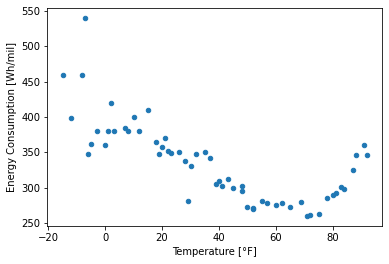

In [2]:
# Extract x, y data
x = data_df.iloc[:, 0].values  # Temperatures
y = data_df.iloc[:, 1].values  # Consumption

# Plot data
%matplotlib inline
import matplotlib.pyplot as plt

data_df.plot.scatter("Temperature [°F]", "Energy Consumption [Wh/mil]")
plt.show()

As you can see, electric cars consume more energy during cold weather. The optimal consumption is around 70°F (21°C) and then increases with warmer temperatures.

We can use a polynomial to model the relationship between the two variables. Let’s see how to do that with Scikit-learn.

#### Create the polynomial features
Scikit-learn implements a PolynomialFeatures object to build the polynomial features. Note that it’s considered as a preprocessing step because it’s done before fitting the model.

In [3]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Create the object
pf_obj = PolynomialFeatures(degree=2)

# Create the polynomial features
X2 = pf_obj.fit_transform(
    # Pass two dimensional array
    x[:, np.newaxis]  # (57,) -> (57,1)
)

print("Shape:", X2.shape)

Shape: (57, 3)


In the Scikit-learn jargon, this object is a preprocessor which means that it implements the fit() and transform() functions.

Here is the code to create the polynomial features that correspond to a polynomial of degree 2.



We start by creating the PolynomialFeatures object and set its degree with the degree parameter. Then, we obtain the features by passing the input data to its fit_transform() function which is a shortcut for the fit() and transform() ones.

In [4]:
# Fit the preprocessor
pf_obj.fit(x[:, np.newaxis])

# Create the polynomial features
X2 = pf_obj.transform((x[:, np.newaxis]))

In this code, fit() computes the number of output features and transform() creates them. Again, Scikit-learn works with 2-dimensional Numpy arrays, and we need to add a dimension to x using the x[:, np.newaxis] syntax.

Scikit-learn labels each new feature in X2, and we can obtain these labels with the get_feature_names_out() function.

In [5]:
# Get feature names
feature_names = pf_obj.get_feature_names_out()

print("Features:", feature_names)


Features: ['1' 'x0' 'x0^2']


Here, x0 denotes temperatures. As we can see, Scikit-learn adds a 1 to the polynomial features which corresponds to the intercept term. However, we will use the LinearRegression object which already fits one. Hence, this new feature is not necessary and we can remove it by setting the include_bias parameter to False.

In [6]:
# Create the object
pf_obj = PolynomialFeatures(degree=2, include_bias=False)

# Create the polynomial features
X2 = pf_obj.fit_transform(x[:, np.newaxis])

# Get feature names
feature_names = pf_obj.get_feature_names_out()

print("Features:", feature_names)

Features: ['x0' 'x0^2']


#### Fit a linear regression
Let’s fit a linear regression to the new set of features.



In [7]:
from sklearn.linear_model import LinearRegression

# Create linear regression
linreg = LinearRegression()

# Fit it
linreg.fit(X2, y)

LinearRegression()

We can now plot the model by generating a hundred sample data points.

In [8]:
# Generate a hundred values between min(x) and max(x)
x_values = np.linspace(min(x), max(x), num=100)
X_values2 = pf_obj.transform(x_values[:, np.newaxis])

Note that we need to create the polynomial features for these x_values with the transform() function. Again, you can also use the Numpy c_ object.

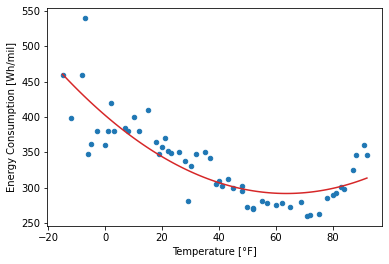

In [9]:
X_values2 = np.c_[x_values, x_values ** 2]
# Compute predictions
y_values = linreg.predict(X_values2)

# Plot predictions
data_df.plot.scatter("Temperature [°F]", "Energy Consumption [Wh/mil]")
plt.plot(x_values, y_values, color="C3")
plt.show()

The model captures the main trend but doesn’t fit well the data. You can try to increase the degree of the set of polynomial features. We leave it to you as an exercise. Here is the result for degrees 3, 5 and 10.

It seems that the curve gets more complex when we increase the degree which can lead to overfitting. Large degrees might result in models that fit the noise in the data rather than the signal. In our example, the degree five seems to generalize well from the data.

In [10]:
#### Splitting data with Numpy

import pandas as pd

# Load the data
data_df = pd.read_csv("c3_electric-cars.csv")

# First five rows
data_df.head()

,Temperature [°F],Energy Consumption [Wh/mil]
0,-15,460
1,-12,398
2,-8,460
3,-7,540
4,-6,347


Our goal is to split these x/y points into a train and a test set. To achieve this, we will generate two lists of indexes. One for data points in the train set and the other for data points in the test set.

First, let’s start by creating a list with all the indexes that we can then split into two.

In [11]:
import numpy as np

# Generate a list of indexes
n = len(data_df)
indexes = np.arange(n)

print("indexes:", indexes)

indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56]


We can now split this list. For this example, we will do a 70-30 split.



In [12]:
# Split into train/test indexes
split_idx = int(n * 0.7)
train_idx = indexes[:split_idx]
test_idx = indexes[split_idx:]

print("train indexes:", train_idx)
print("test indexes:", test_idx)

train indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
test indexes: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56]


The idea is to compute the index split_idx at which we need to split the data, and then use it to separate the list of indexes into two. Note that the data is not necessarily separable into 70-30 parts. For this reason, we use the int() Python built-in function to convert n*0.7 into an integer.

Finally, we can separate the x/y data points into train/test sets using the train_idx and test_idx lists.

As we can see, there are 39 data points in the train set and 18 in the test one. Let’s plot these two sets.

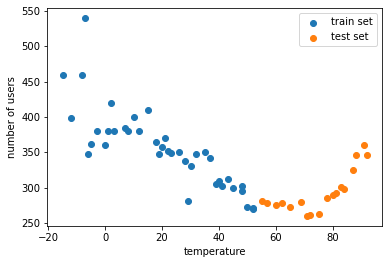

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot data points
plt.scatter(x_tr, y_tr, label="train set")
plt.scatter(x_te, y_te, label="test set")
plt.xlabel("temperature")
plt.ylabel("number of users")
plt.legend()
plt.show()


This is a bad split because neither of the sets represents well the entire data. The issue is that the data points are ordered by temperatures in the original .csv file. Hence, when we split the data, the 39 points with the lowest temperatures go into the train set and the remaining 18 into the test set.

#### Shuffling the indexes
One solution is to shuffle the data before splitting it. In this unit, we will shuffle the list of indexes rather than the data points directly. This has the advantage of leaving the original data unmodified.

To achieve this, we can use the shuffle() function from the Numpy random module.

In [16]:
# shuffle the indexes
np.random.shuffle(indexes)

print("indexes:", indexes)  # result depends on the seed

indexes: [53 36 13 55 45 56  7 52 28 22 24 17 15 11 27 26 20  1 10 21 40 30 51 31
 14 46  9 23 44 12 25  0 38  4 41 37  6 29 42 39 18 35 16 54 50  8 33 19
  5 49  3 34 47 32  2 48 43]


Numpy shuffles the data differently each time we run this code. In fact, it uses a random number generator to shuffle the data, and we can fix its results by setting its seed number with the seed() function.

In [17]:
# Create the indexes
indexes = np.arange(n)

# Shuffle the indexes
np.random.seed(0)
np.random.shuffle(indexes)

print("indexes:", indexes)

indexes: [35 34 41 27 11  2 33 56 22 55  4 10 29 50 32 40 37  7 14 31 28 46 51 18
 54 26 15  5 30 16 48 20 49  8 13 25 17 42 45 38  1 12 43 24  6 23 36 21
 19  9 39 52  3  0 53 47 44]


We can now split the indexes into train/test indexes.

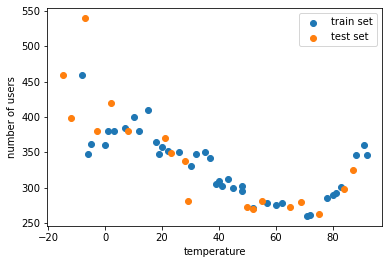

In [18]:
# Split into train/test indexes
split_idx = int(n * 0.7)
train_idx = indexes[:split_idx]
test_idx = indexes[split_idx:]

# Split data
x_tr, y_tr = x[train_idx], y[train_idx]
x_te, y_te = x[test_idx], y[test_idx]

# Plot data points
plt.scatter(x_tr, y_tr, label="train set")
plt.scatter(x_te, y_te, label="test set")
plt.xlabel("temperature")
plt.ylabel("number of users")
plt.legend()
plt.show()

#### With Scikit-learn

Splitting the data is a common operation in machine learning. For this reason, Scikit-learn implements a train_test_split() function in its model_selection module.



In [19]:
from sklearn.model_selection import train_test_split

# Split data
x_tr, x_te, y_tr, y_te = train_test_split(
    x, y, train_size=0.7, test_size=0.3, random_state=0
)

The function takes a set of arrays and split them into train/test sets. We can specify the size of each set with the train_size and the test_size parameters, and set the seed with random_state. In this code, the two sizes are percentages of data. But we can also specify the number of points.



In [20]:
from sklearn.model_selection import train_test_split

# Split data
x_tr, x_te, y_tr, y_te = train_test_split(
    x, y, train_size=39, test_size=18, random_state=0
)

#### Model selection
In a previous unit, we fitted a polynomial of degree 5 and another of degree 10 to this dataset. Let’s see which one has a better generalization error according to our test set.

We create the two models using the Numpy polyfit() function and evaluate them with the mean_squared_error() function from Scikit-learn.

In [21]:
from sklearn.metrics import mean_squared_error as mse

# Polynomial regressions of degree 5 and 10
coef5 = np.polyfit(x_tr, y_tr, deg=5)
coef10 = np.polyfit(x_tr, y_tr, deg=10)

# Evaluate performance
y_pred5_tr = np.polyval(coef5, x_tr)
y_pred5_te = np.polyval(coef5, x_te)

print(
    "Degree 5 MSE: {:.0f} (train) vs {:.0f} (test)".format(
        mse(y_tr, y_pred5_tr), mse(y_te, y_pred5_te)
    )
)
# Degree 5 MSE: 719 (train) vs 651 (test)

y_pred10_tr = np.polyval(coef10, x_tr)
y_pred10_te = np.polyval(coef10, x_te)

print(
    "Degree 10 MSE: {:.0f} (train) vs {:.0f} (test)".format(
        mse(y_tr, y_pred10_tr), mse(y_te, y_pred10_te)
    )
)

Degree 5 MSE: 719 (train) vs 651 (test)
Degree 10 MSE: 707 (train) vs 1218 (test)


Electric car consumption
The electric car consumption dataset contains 57 measurements of the energy consumption, by miles, of an electric car in different temperature settings. The dataset is inspired by this study which analyzed the effect of temperatures on the efficiency, range and emissions of electric vehicles in different regions of the United States.

Let’s start by loading the dataset.

We can see that the polynomial of degree 10 has a better training error than the polynomial of degree 5. However, its test score nearly doubles which means that it’s likely overfitting. On the other hand, the polynomial of degree 5 seems to generalize well from the data with a test score close to its train score.

#### One-hot encoding (dummy variables)
So far, we worked with variables that are quantitative, e.g., temperatures, wind speed, humidity. But many datasets also have categorical features, e.g., the day of the week, season, type of weather. In this unit, we will see how to preprocess these categorical variables using one-hot encoding.

This time, we will work with a modified version of the bike sharing dataset with one quantitative and one categorical variable.

#### Categorical variables
Let’s start by loading the dataset.

In [24]:
import pandas as pd

# Load the data
data_df = pd.read_csv("c3_bike-small.csv")

# First five rows
data_df.head()

,temp,weekday,casual
0,0.344,6,331
1,0.363,0,131
2,0.196,1,120
3,0.200,2,108
4,0.227,3,82


In [25]:
data_df.weekday.value_counts()

6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: weekday, dtype: int64

In this example, Monday corresponds to zero and Sunday to six, but this numerical encoding is somewhat arbitrary. In fact, with this encoding, the weekday variable doesn’t indicate the day of the week but how far we are from the beginning of the week.

Let’s do a quick experiment. Let’s fit a linear regression with and without this variable and compare the two 
R
2
 coefficients. Note that in this unit we work only with the training set and for simplicity we use the names x, y instead of x_tr, y_tr.

In [26]:
# Create X/y data
X = data_df[["temp"]].values
y = data_df.casual.values

# Fit a linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.29525001840042775

Let’s add the weekday variable and see whether this improves the performance of our model.

In [27]:
# Create X/y data
X = data_df[["temp", "weekday"]].values
y = data_df.casual.values

# Fit a linear regression
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.2988588081409286

We can see that the two 
R
2
 coefficients are very close and that the weekday variable isn’t really useful in its current format. However, there is a more appropriate way to encode this variable: one-hot encoding.

#### One-hot encoding
The idea is to create a new variable for each possible value. In our example, we create a variable for each day of the week which indicates whether the measurement was made that day. It’s called one-hot encoding because only one variable from the seven can be positive at a time. These indicators are also called dummy variables.

Pandas implements a get_dummies() function to create the dummies. We pass the DataFrame and specify which columns are categorical with the columns parameter. The code should return the first five rows of the DataFrame with the dummy variables.

In [28]:
pd.get_dummies(data_df, columns=["weekday"]).head()

,temp,casual,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.344,331,0,0,0,0,0,0,1
1,0.363,131,1,0,0,0,0,0,0
2,0.196,120,0,1,0,0,0,0,0
3,0.200,108,0,0,1,0,0,0,0
4,0.227,82,0,0,0,1,0,0,0


In [29]:
# We can now fit a linear regression using this new encoding.
# One-hot encoding
encoded_df = pd.get_dummies(data_df, columns=["weekday"])

# Create X/y data
X = encoded_df.drop(["casual"], axis=1).values
y = encoded_df.casual.values

# Fit a linear regression
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.5969174988134782

As we can see, the 
R
2
 coefficient is now close to 0.6 which is much better than the two previous models.

Note that each category now has a redundant column. We can drop it with the drop_first attribute.



In [30]:
# One-hot encoding
encoded_df = pd.get_dummies(data_df, columns=["weekday"], drop_first=True)
encoded_df.head()

,temp,casual,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.344,331,0,0,0,0,0,1
1,0.363,131,0,0,0,0,0,0
2,0.196,120,1,0,0,0,0,0
3,0.200,108,0,1,0,0,0,0
4,0.227,82,0,0,1,0,0,0


If we look at this plot, we see that the ordinal variable weekday doesn't have a linear relationship with the target "casual". This means that a simple linear model can only do so much in this case. (Remember that a linear model can only fit straight lines in the case of single features). One-hot encoding is a common transformation for features that have non-linear relationships with the target to add more flexibility to linear models. (This type of transformation is not necessarily beneficial for other models that we will discuss in Course 4).

Text(0, 0.5, 'Casual')

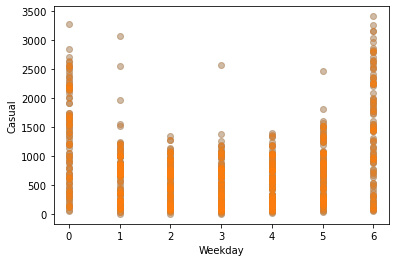

In [ ]:

# Plot 'weekday' against the target casual
import matplotlib.pyplot as plt

plt.scatter(data_df['weekday'],data_df['casual'],alpha=0.3);
plt.xlabel('Weekday')
plt.ylabel('Casual')

The following code will hopefully allow visualizing the effect of one-hot encoding on model predictions. I've fitted two linear models:

* Model 1: I'm using only the ordinal feature weekday to predict the target casual.
* Model 2: I'm using the one-hot encoded features weekday_x to predict the target casual.

Please note that I've purposefully left the feature temp out of these models, as I wanted to focus on the effect of one-hot encoding on model performance. Adding the temp feature will, of course, further improve model performance.

Model 1: R2=0.004
Model 2: R2=0.274


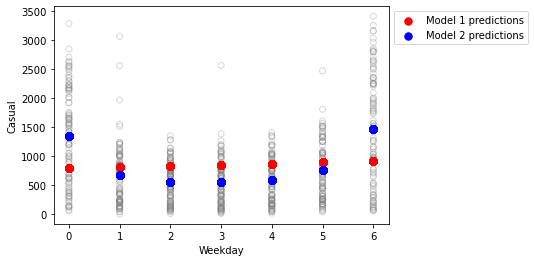

In [34]:
# Load dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the data
data_df = pd.read_csv('c3_bike-small.csv')

# Model 1: `weekday` is ordinal

# Create X/y data
X = data_df[['weekday']].values
y = data_df.casual.values

# Fit model
lr1 = LinearRegression()
lr1.fit(X, y)

# Model 2: `weekday` is one-hot encoded

# Apply one-hot encoding
encoded_df = pd.get_dummies(data_df, columns=['weekday'], drop_first=True)

# Create X data
X_new = encoded_df.drop(['temp','casual'],axis=1)  # Remove feature 'temp' and the target

# Fit model
lr2 = LinearRegression()
lr2.fit(X_new, y)

# Print R2
print('Model 1: R2={}'.format(np.round(lr1.score(X,y),3)))   # Prints: Model 1: R2=0.004
print('Model 2: R2={}'.format(np.round(lr2.score(X_new,y),3)))  # Prints: Model 2: R2=0.274

# Plot ordinal `weekday` against target
plt.scatter(data_df['weekday'],data_df['casual'], color="none", edgecolor='grey', alpha=0.3, label=None);

# Model 1: Plot predictions
plt.scatter(data_df['weekday'],lr1.predict(X), color="red", s=55, label='Model 1 predictions')

# Model 2: Plot predictions
plt.scatter(data_df['weekday'],lr2.predict(X_new), color="blue", s=55, label='Model 2 predictions')

plt.xlabel('Weekday')
plt.ylabel('Casual')

plt.legend(bbox_to_anchor=(1,1));